# Heart Failure Prediction Dataset - Exploratory Data Analysis

This notebook performs a comprehensive exploratory data analysis on the Heart Failure Prediction dataset from Kaggle to understand the relationships between various features and heart disease.

## Importing Libraries

First, let's import all the necessary libraries for data analysis and visualization.

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import kagglehub
import os
import shutil

## Data Acquisition

Download the Heart Failure Prediction dataset from Kaggle and save it to the local directory.

In [97]:
default_path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
target_folder = "./datasets"
os.makedirs(target_folder, exist_ok=True)

path = os.path.join(target_folder, "heart-failure-prediction")
shutil.move(default_path, path)
path = os.path.join(path, "heart.csv")
print("Dataset installed at:", path)

Dataset installed at: ./datasets/heart-failure-prediction/heart.csv


## Data Loading and Initial Exploration

Let's load the dataset and examine its structure and basic properties.

In [98]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [99]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Quality Assessment

Check for missing values and examine the statistical summary of the dataset.

In [100]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [101]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Univariate Analysis

Analyze the distribution of individual features.

Histograms of Numeric Features


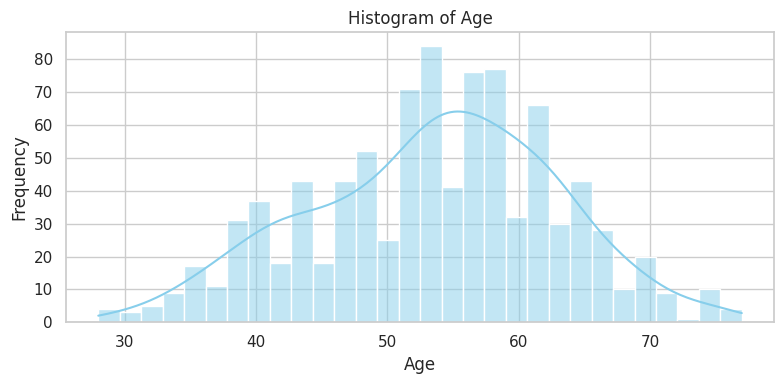

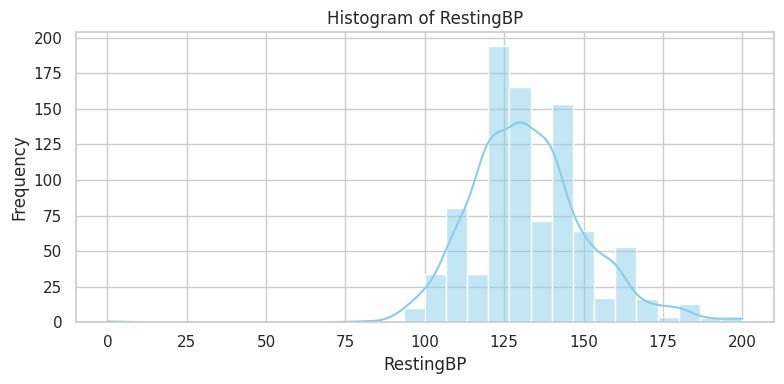

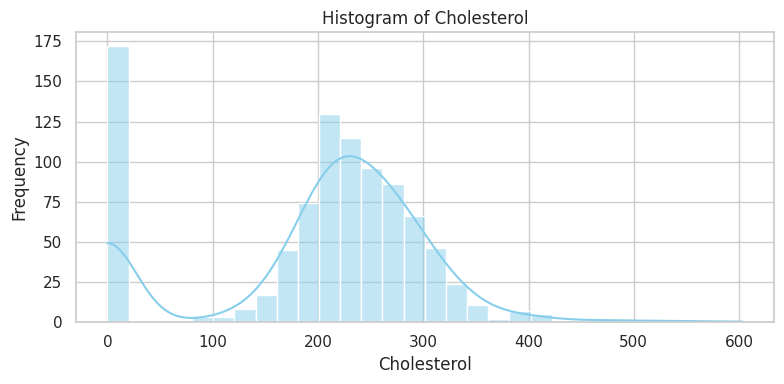

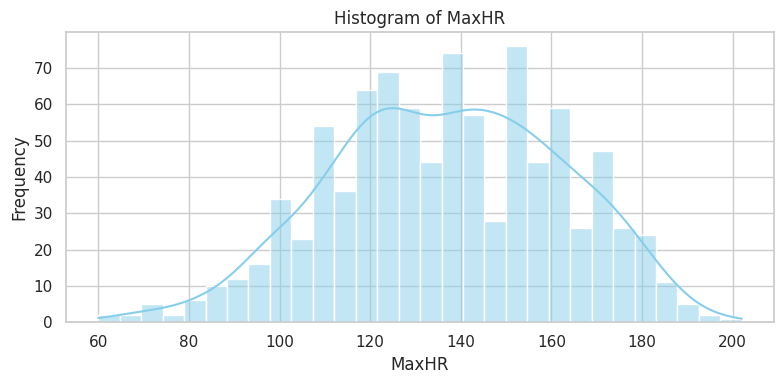

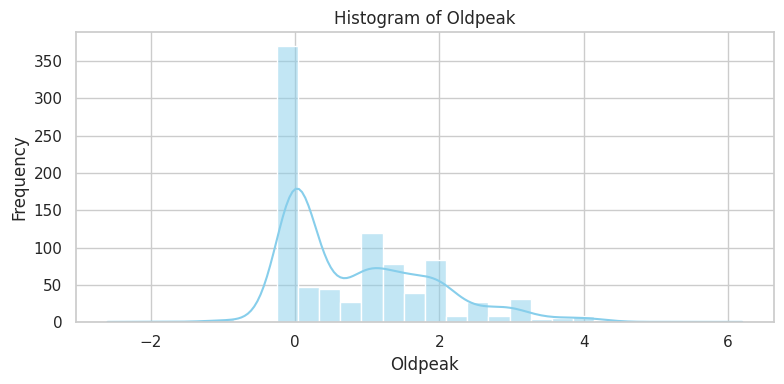

In [102]:
sns.set_theme(style="whitegrid")

# List of numeric features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

print("Histograms of Numeric Features")
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Boxplots of Numeric Features


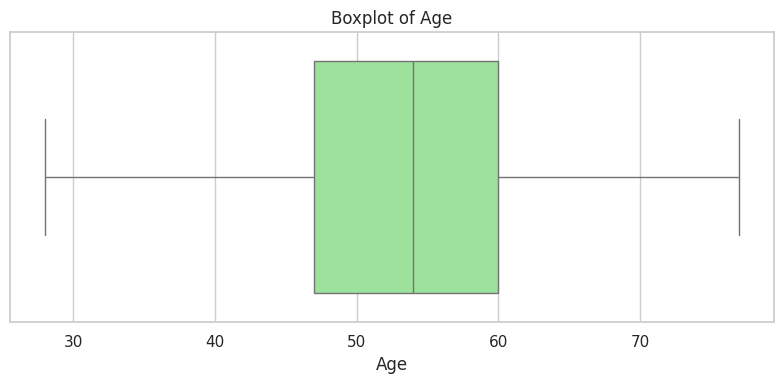

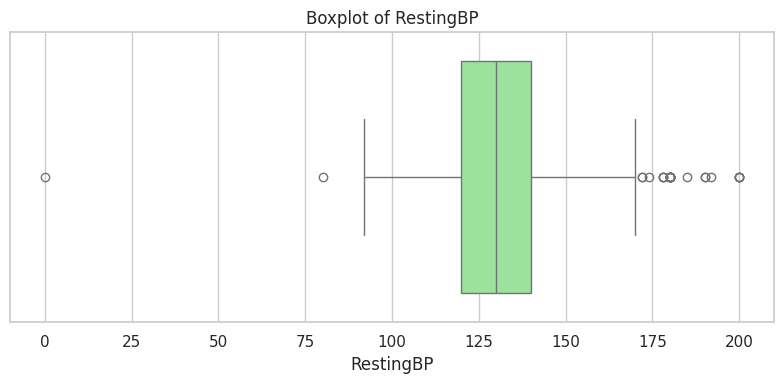

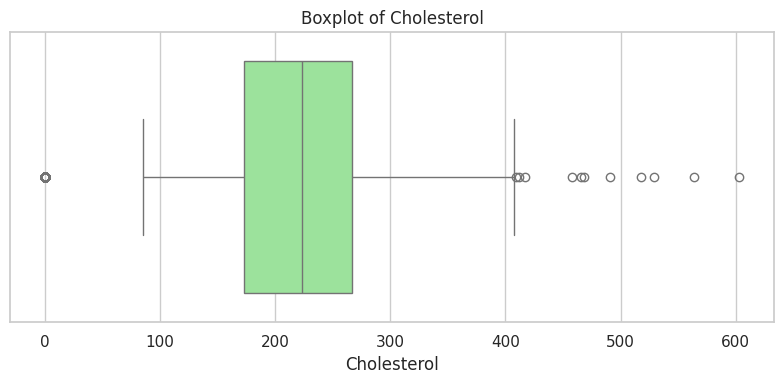

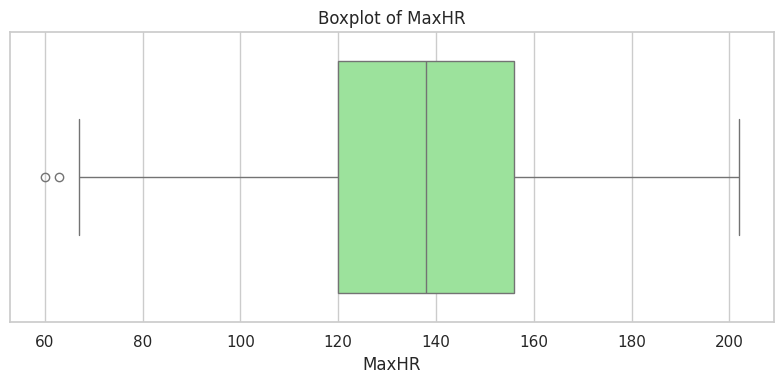

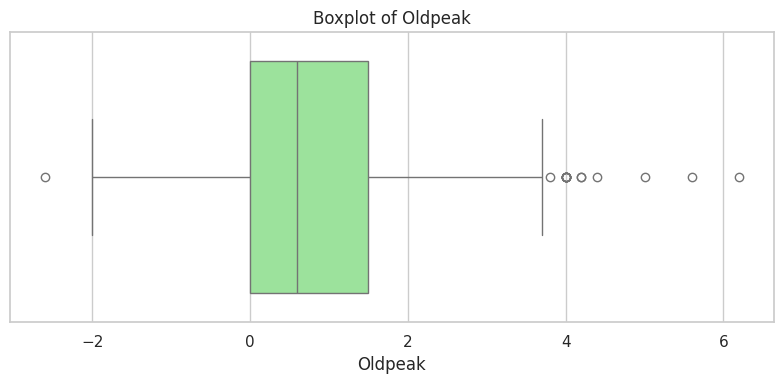

In [103]:
print("Boxplots of Numeric Features")
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

## Multivariate Analysis

Examine relationships between multiple variables, focusing on how they relate to heart disease.

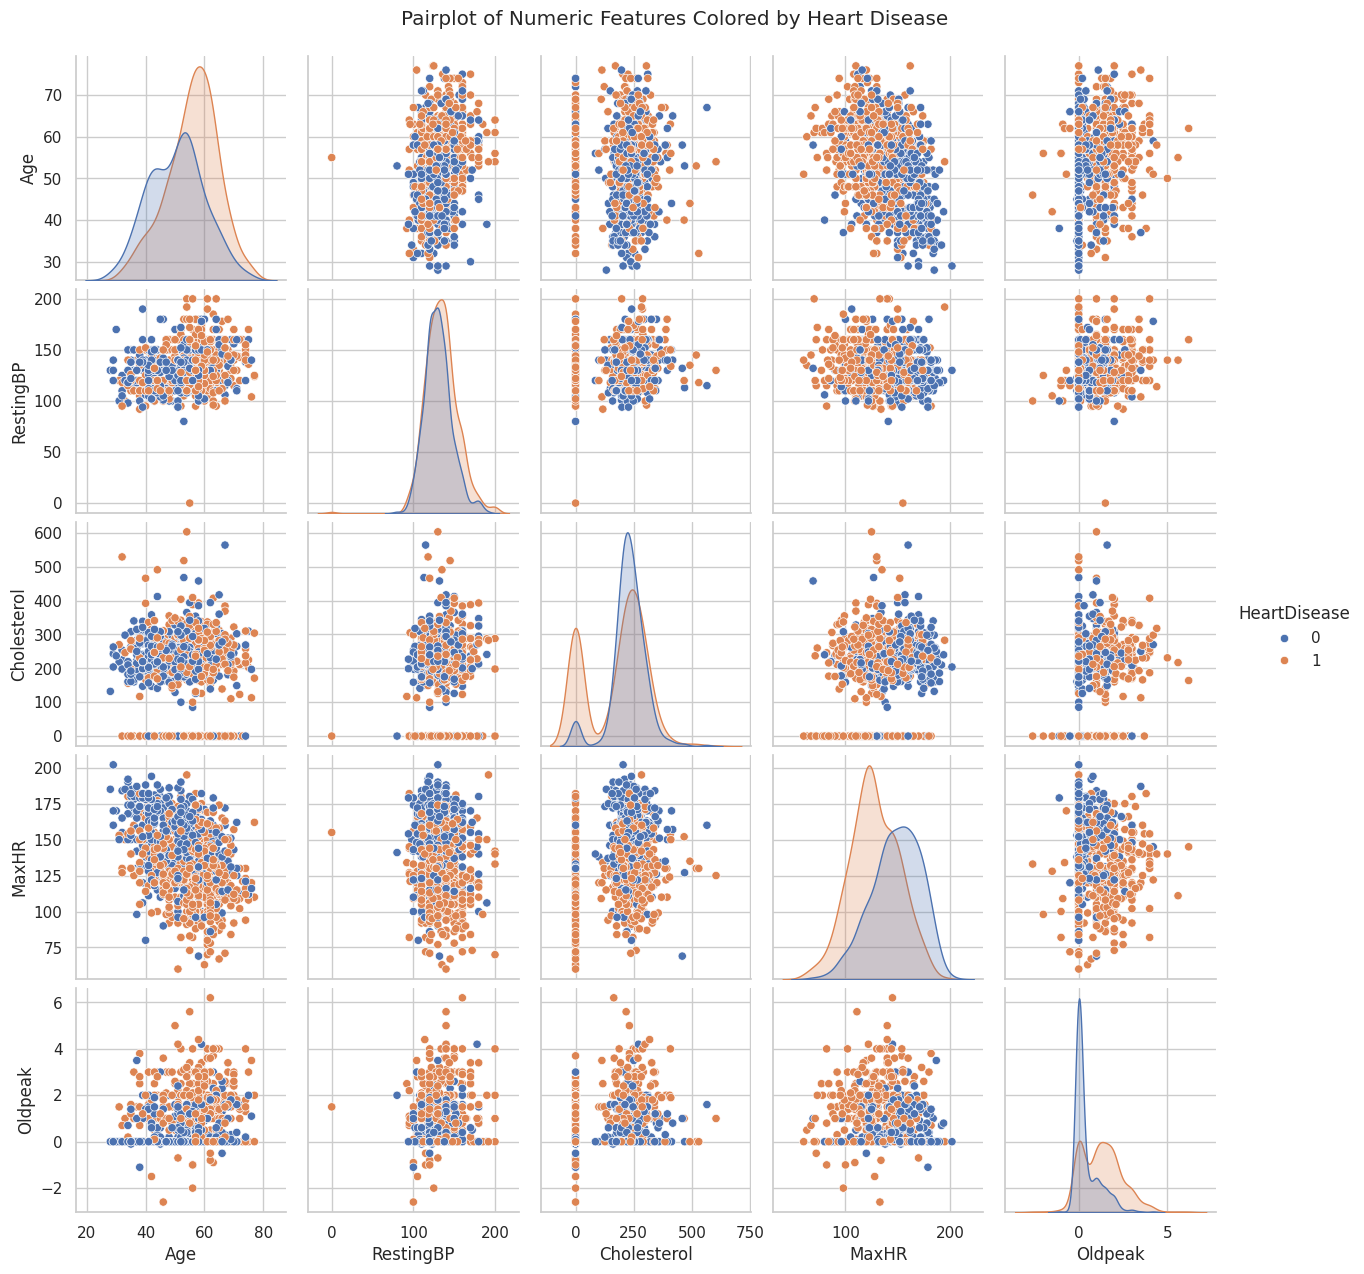

In [104]:
# Create a pairplot to visualize relationships between numeric features, colored by heart disease status
sns.pairplot(df[numeric_features + ['HeartDisease']], hue='HeartDisease')
plt.suptitle("Pairplot of Numeric Features Colored by Heart Disease", y=1.02)
plt.show()

## Correlation Analysis

Analyze the correlation between numeric features and heart disease.

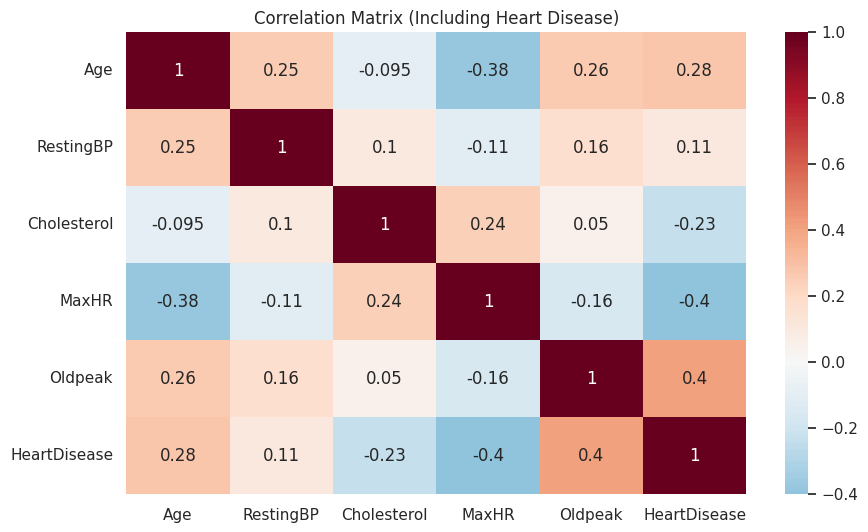

In [105]:
# Calculate correlation matrix
corr_matrix = df[numeric_features + ['HeartDisease']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title("Correlation Matrix (Including Heart Disease)")
plt.show()

## Feature-Specific Analysis

Detailed analysis of individual features and their relationship with heart disease.

### Oldpeak Analysis

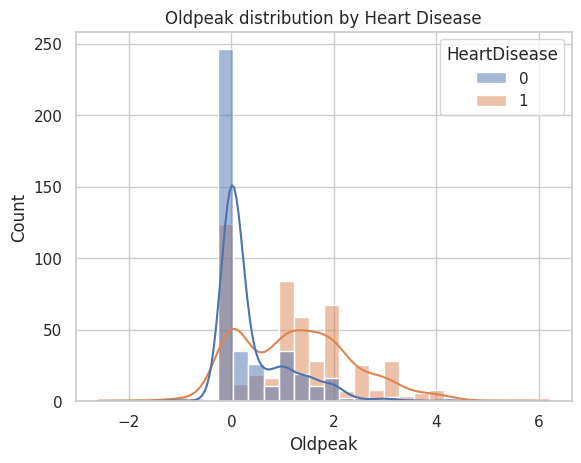

In [106]:
sns.histplot(data=df, x='Oldpeak', hue='HeartDisease', bins=30, kde=True)
plt.title("Oldpeak distribution by Heart Disease")
plt.show()

### Maximum Heart Rate Analysis

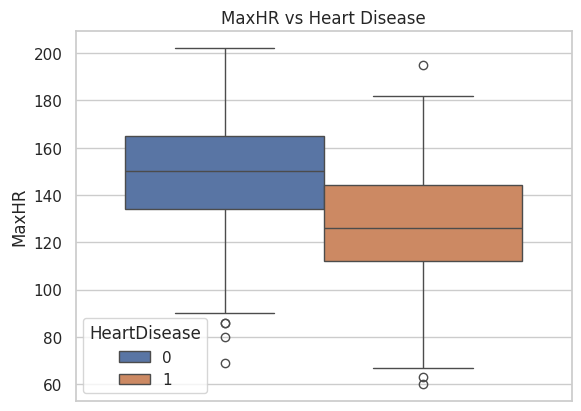

In [107]:
sns.boxplot(hue='HeartDisease', y='MaxHR', data=df)
plt.title("MaxHR vs Heart Disease")
plt.show()

### Chest Pain Type Analysis

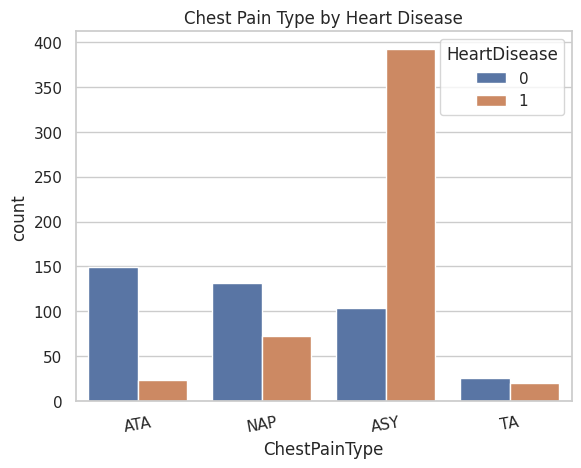

In [108]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
plt.title("Chest Pain Type by Heart Disease")
plt.xticks(rotation=10)
plt.show()

### Cholesterol Analysis

Cholesterol value counts:
Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64
Number of cholesterol = 0 entries: 172


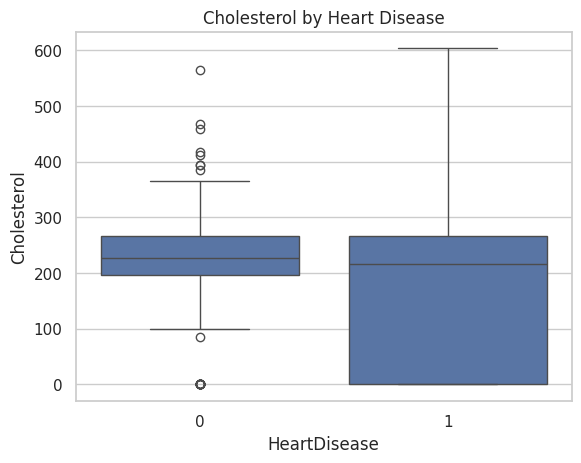

In [109]:
print("Cholesterol value counts:")
print(df['Cholesterol'].value_counts().sort_index())
print("Number of cholesterol = 0 entries:", (df['Cholesterol'] == 0).sum())

sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Cholesterol by Heart Disease")
plt.show()

### Age Analysis

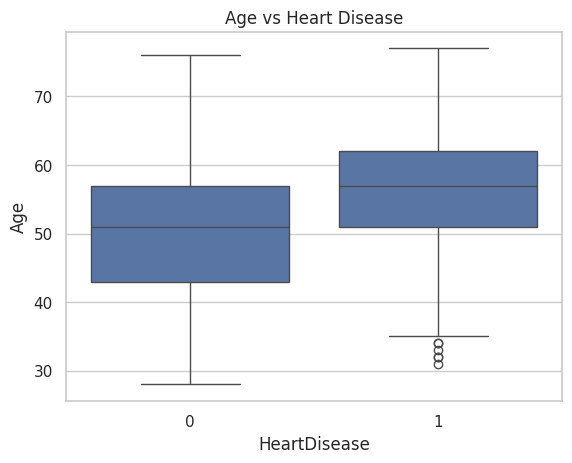

In [110]:
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

### Exercise Angina Analysis

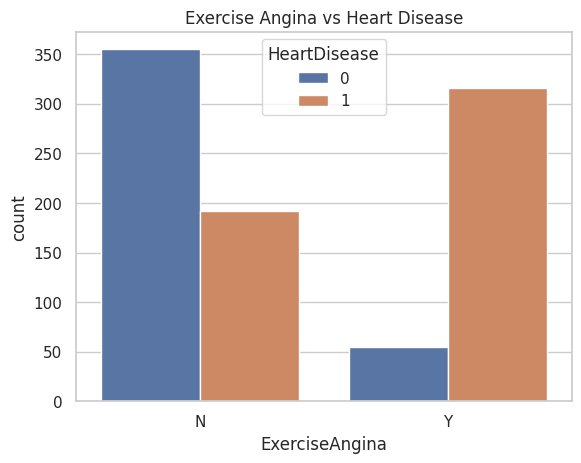

In [111]:
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df)
plt.title("Exercise Angina vs Heart Disease")
plt.show()

### Blood Pressure and Cholesterol Analysis

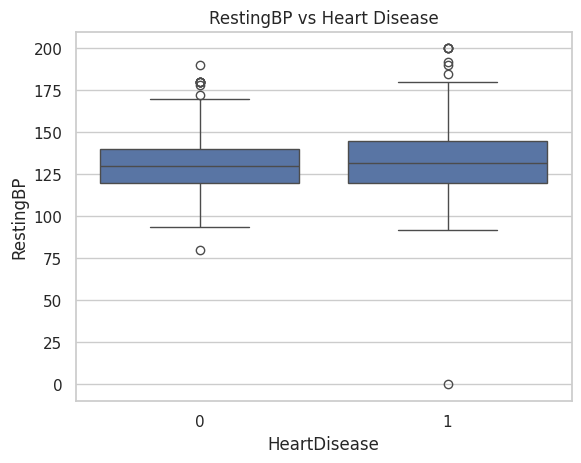

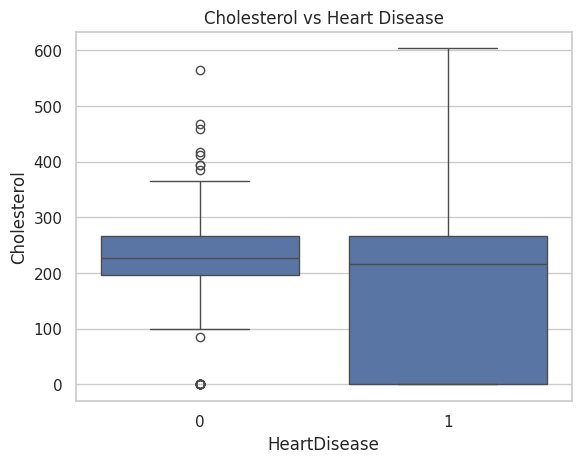

In [112]:
# Resting Blood Pressure comparison
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title("RestingBP vs Heart Disease")
plt.show()

# Cholesterol comparison
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

## Categorical Features Analysis

Analyze the distribution of categorical features in relation to heart disease.

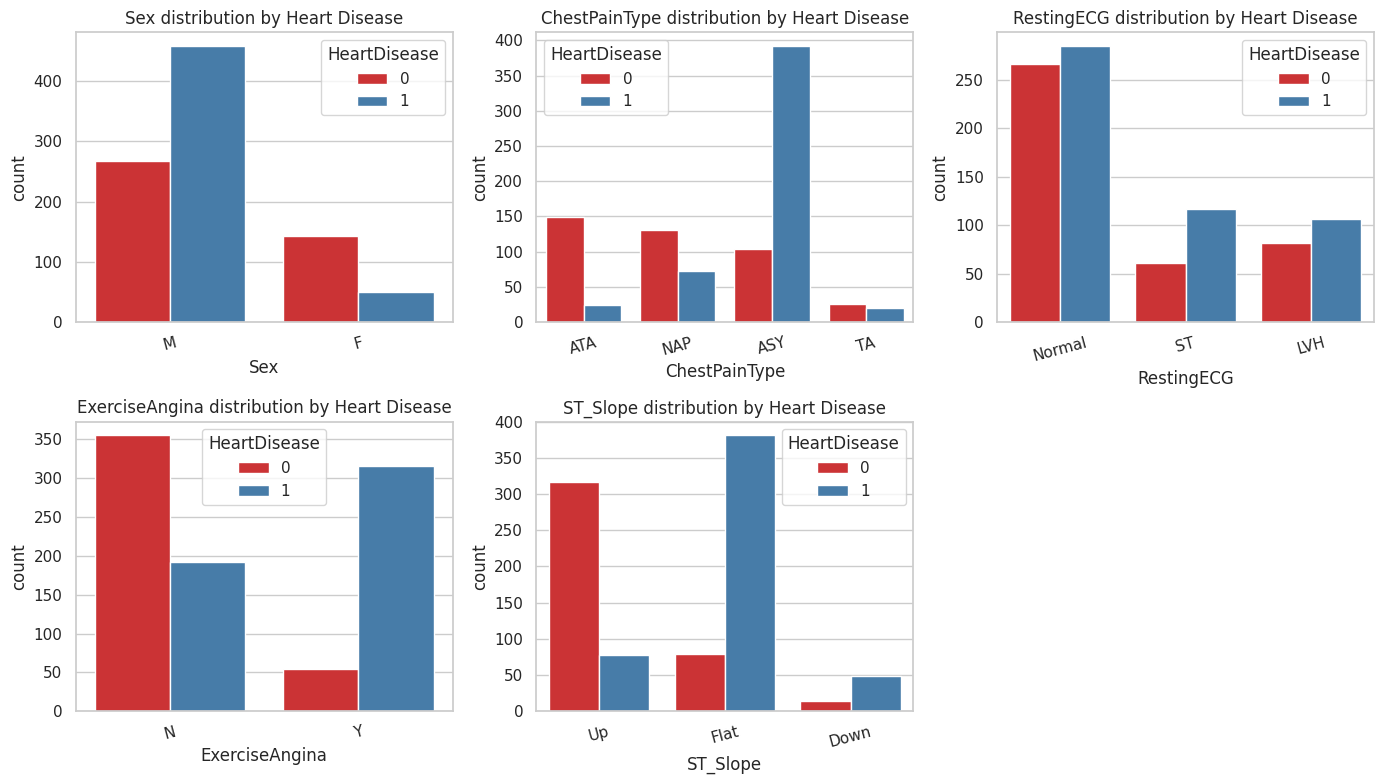

In [113]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='HeartDisease', palette='Set1', ax=axes[i])
    axes[i].set_title(f'{col} distribution by Heart Disease')
    axes[i].tick_params(axis='x', rotation=15)

# Remove unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Numerical Features by Heart Disease

Compare the distributions of numerical features between patients with and without heart disease.

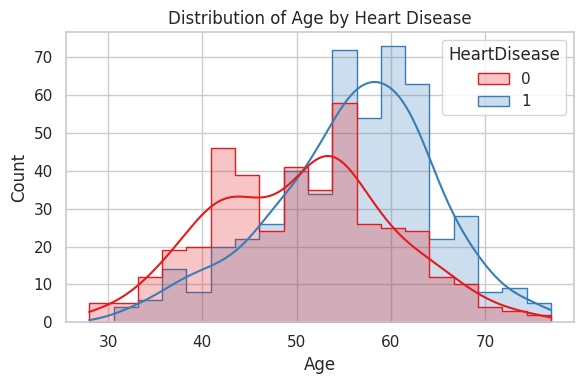

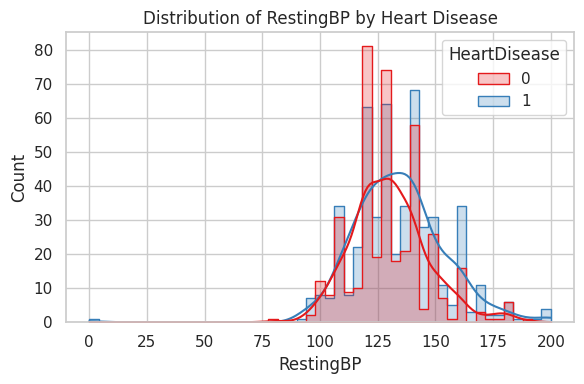

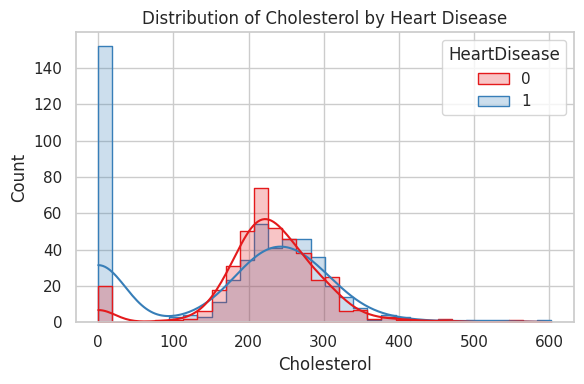

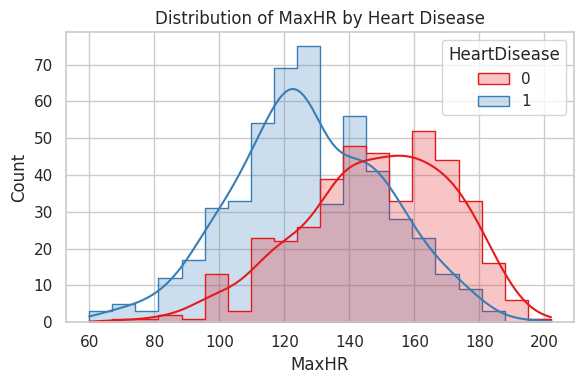

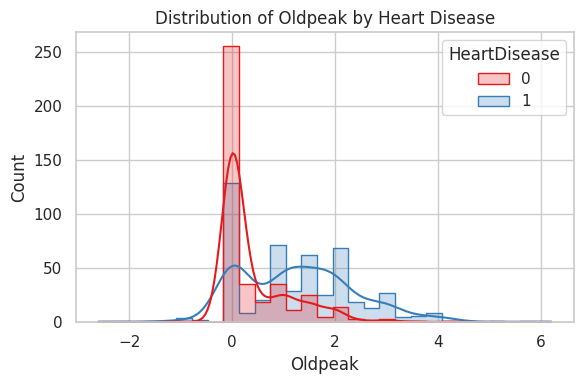

In [114]:
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, palette='Set1', element='step')
    plt.title(f'Distribution of {feature} by Heart Disease')
    plt.tight_layout()
    plt.show()

## Conclusion

This exploratory data analysis reveals several key insights about the heart failure prediction dataset:

1. **Strong correlations**: Oldpeak shows a positive correlation with heart disease, while MaxHR shows a negative correlation.
2. **Categorical features**: Chest pain type, exercise-induced angina, and ST slope are strong indicators of heart disease risk.
3. **Age factor**: Older patients generally have a higher risk of heart disease.
4. **Cholesterol anomaly**: There are unusual zero values for cholesterol that may need to be addressed in preprocessing.

These insights can guide further preprocessing and feature selection for developing a heart disease prediction model.